In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import linalg

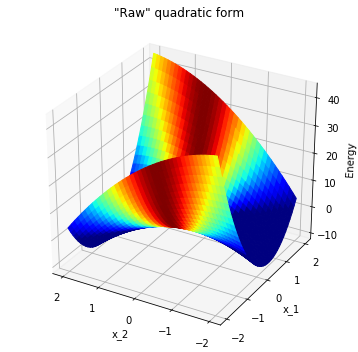

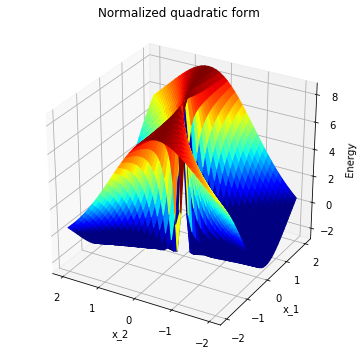

In [202]:
# 168. Code challenge: visualize the normalized quadratic form
A = np.array([[-2, 3], [2, 8]])

n = 40 # will see more or less "tiles" on surface plot based on this number
xi = np.linspace(-2, 2, n)
qf = np.zeros((len(xi), len(xi)))
qfN = np.zeros((len(xi), len(xi)))

for i in range(n):
    for j in range(n):
        # create the x (coordinate) vector
        x = np.array([xi[i], xi[j]])
        xt = np.transpose(x)

        # Compute the quadratic forms
        # qf[i,j] = x'*A*x
        # qfN[i,j] = x'*A*x / x'x
        qf[i, j] = np.transpose(x)@A@x
        qfN[i, j] = (np.transpose(x)@A@x) / (np.transpose(x)@x)

# show the map - qf (raw), surface plot code contributed by Laurens Sandt, lines 22-27
X,Y = np.meshgrid(xi,xi)
Z = np.transpose(qf)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121, projection='3d') # 121 - 1 row, 2 columns, 1st subplot
surf1 = ax1.plot_surface( X, Y, Z, cmap=mycmap, facecolors = my_col) # plot matrix as surface
#fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
plt.xlabel('x_2')
plt.ylabel('x_1')
ax1.title.set_text('\"Raw\" quadratic form')
ax1.set_zlabel('Energy', fontsize=10, rotation = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=6)
plt.gca().invert_xaxis()

# show the map - qfN (normalized)
X,Y = np.meshgrid(xi,xi)
Z = np.transpose(qfN)
my_col = cm.jet(Z/np.amax(Z))
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(122, projection='3d') 
surf1 = ax1.plot_surface( X, Y, Z, cmap=mycmap, facecolors = my_col) # plot matrix as surface
#fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
plt.xlabel('x_2')
plt.ylabel('x_1')
ax1.title.set_text('Normalized quadratic form')
ax1.set_zlabel('Energy', fontsize=10, rotation = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=6)
plt.gca().invert_xaxis()
